# Imports

In [1]:
import sys
import os
import pickle

import pandas as pd


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1


In [2]:
# My functions
from src.regression import pipeline, inference
from src.result_visualizations import (
    pretty_print_metrics, plot_metrics, plot_features_interactive
)

In [3]:
model_names = [
    "ElasticNet",
    "SVR",
    "BayesianRidge"
]

RANDOM_STATE = 42

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
print(DATA_DIR)
print(MODELS_DIR)

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1/data
/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-1/models


In [4]:
dev_df = pd.read_csv(os.path.join(DATA_DIR, "development_final.csv"), index_col=0)
val_df = pd.read_csv(os.path.join(DATA_DIR, "validation_final.csv"), index_col=0)

# Sanity check
display(dev_df.head())
display(val_df.head())

,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,53.0,19.01,0.000000,0.000000,0.000000,0.000000,0.017674,0.000000,0.00000,...,0.005891,0.029457,0.000000,0.000000,0.002946,0.000000,0.000000,0.000000,0.002946,0.100153
1,1,21.0,23.50,0.001028,0.000000,0.000000,0.000000,13.015800,0.001542,0.00000,...,0.000000,0.002569,0.412652,0.003083,0.000000,0.000000,0.008736,0.014903,0.077597,0.004625
2,0,52.0,25.80,0.001406,0.000000,0.000000,0.001406,0.002812,0.201074,0.00000,...,0.000000,0.005624,0.002812,0.007031,0.000000,0.000000,0.000000,0.000000,0.005624,0.016873
3,1,40.0,23.49,0.000000,0.008825,0.273562,0.000000,0.044123,0.004412,0.34857,...,0.017649,0.198553,0.000000,0.158842,0.030886,0.101483,0.000000,0.000000,0.000000,0.000000
4,1,30.0,22.60,0.002878,0.037419,7.359970,0.000000,0.872143,0.000000,0.00000,...,0.305106,0.135283,0.000000,0.051811,0.054689,0.083473,0.020148,0.000000,0.054689,0.011513


,Sex,Host age,BMI,Acholeplasma axanthum,Acidaminococcus fermentans,Acidaminococcus intestini,Actinomyces lingnae,Akkermansia muciniphila,Alistipes finegoldii,Alistipes indistinctus,...,Clostridium sphenoides,Clostridium spiroforme,Clostridium stercorarium,Clostridium symbiosum,Clostridium thermosuccinogenes,Clostridium xylanolyticum,Eubacterium brachy,Eubacterium dolichum,Eubacterium sulci,Ruminococcus gnavus
0,0,60.0,25.71,0.0,0.000000,1.621960,0.0,0.000000,0.068238,0.020996,...,0.000000,2.871240,0.0,0.068238,0.115479,0.015747,0.010498,0.000000,0.010498,0.551152
1,0,57.0,27.20,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,65.0,22.35,0.0,0.002095,0.000000,0.0,0.002095,0.041895,0.000000,...,0.000000,0.064936,0.0,0.016758,0.000000,0.041895,0.010474,0.006284,0.014663,0.000000
3,0,55.0,25.52,0.0,0.000000,0.044998,0.0,0.013846,0.010384,0.000000,...,0.003461,0.089996,0.0,0.003461,0.006923,0.000000,0.000000,0.020768,0.034614,0.013846
4,1,54.0,21.60,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Complete pipeline

In [5]:
# NOTE:
# Uncomment the following lines to rerun the entire pipeline, otherwise skip this
# step and just load the metrics from the pickled file
# The complete pipeline takes around 15 mins on my machine, if you don't want to
# wait, use the next cell to load the results

all_metrics = pipeline(
    models_dir=MODELS_DIR,
    dataset_dir=DATA_DIR
)
with open(
    os.path.join(BASE_DIR, "all_metrics.pkl"),
    "wb"
) as f:
    pickle.dump(all_metrics, f, protocol=pickle.HIGHEST_PROTOCOL)

----------------
Running pipeline
----------------

--------------------
     ElasticNet     
--------------------
      baseline      
--------------------
Training... Training completed
Validating... Validation completed
--------------------
 feature_selection  
--------------------
Training... Training completed
Validating... Validation completed
--------------------
        tune        
--------------------
Training... Training completed
Validating... Validation completed

--------------------
        SVR         
--------------------
      baseline      
--------------------
Training... Training completed
Validating... Validation completed
--------------------
 feature_selection  
--------------------
Training... Training completed
Validating... Validation completed
--------------------
        tune        
--------------------
Training... Training completed
Validating... Validation completed

--------------------
   BayesianRidge    
--------------------
      baseline      
----

In [6]:
# This is used to load the metrics from the pickled file in case the pipeline
# was not re-run

with open(
    os.path.join(BASE_DIR, "all_metrics.pkl"),
    "rb"
) as f:
    all_metrics = pickle.load(f)

# Visualizing the results

In [7]:
# View the output as a scrollable element or open it in a text editor to see it in
# full
tabulated_metrics = pretty_print_metrics(all_metrics)
print(tabulated_metrics)

                    ----------------------------------------                    
                                   ElasticNet                                   
                    ----------------------------------------                    
baseline:
------------------------------
training                                                              validation
---------                                                             ----------
RMSE: 3.1614                            |                            RMSE: 3.8470
MAE: 2.5094                             |                             MAE: 2.7598
R2: 0.0551                              |                              R2: 0.0482

feature_selection:
------------------------------
training                                                              validation
---------                                                             ----------
RMSE: 3.1611                            |                            RMSE: 3.8650
MAE: 2.5120  

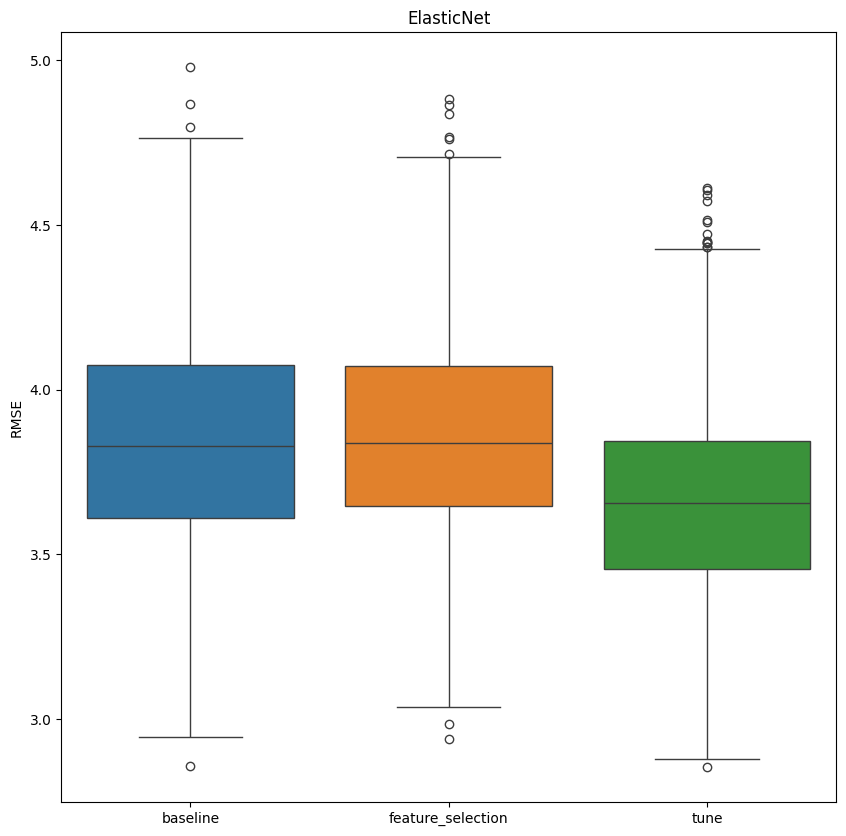

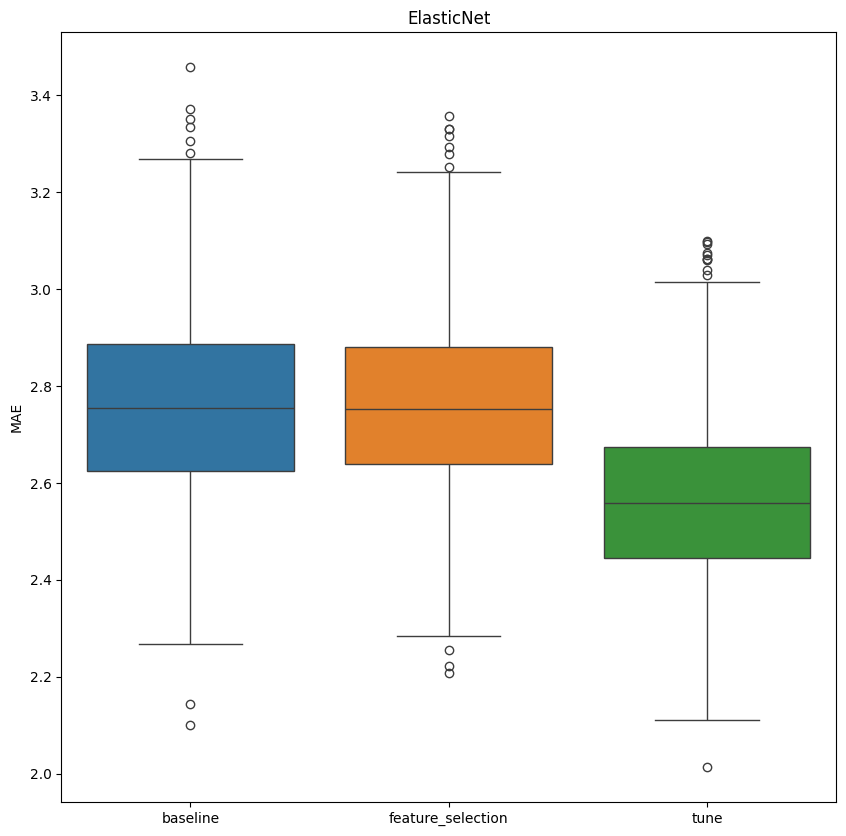

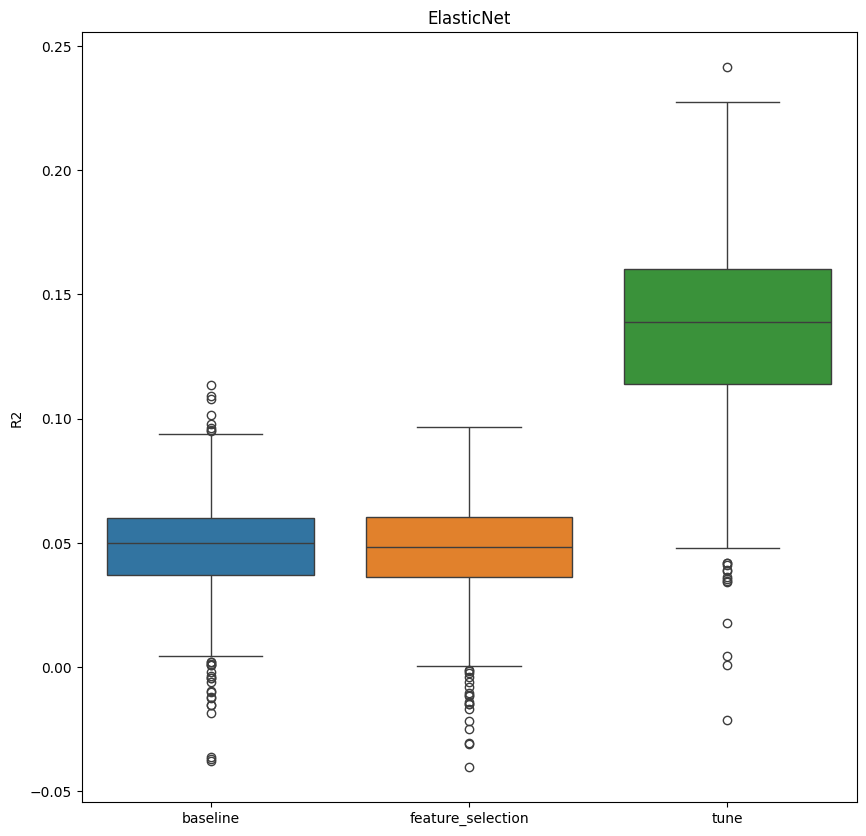

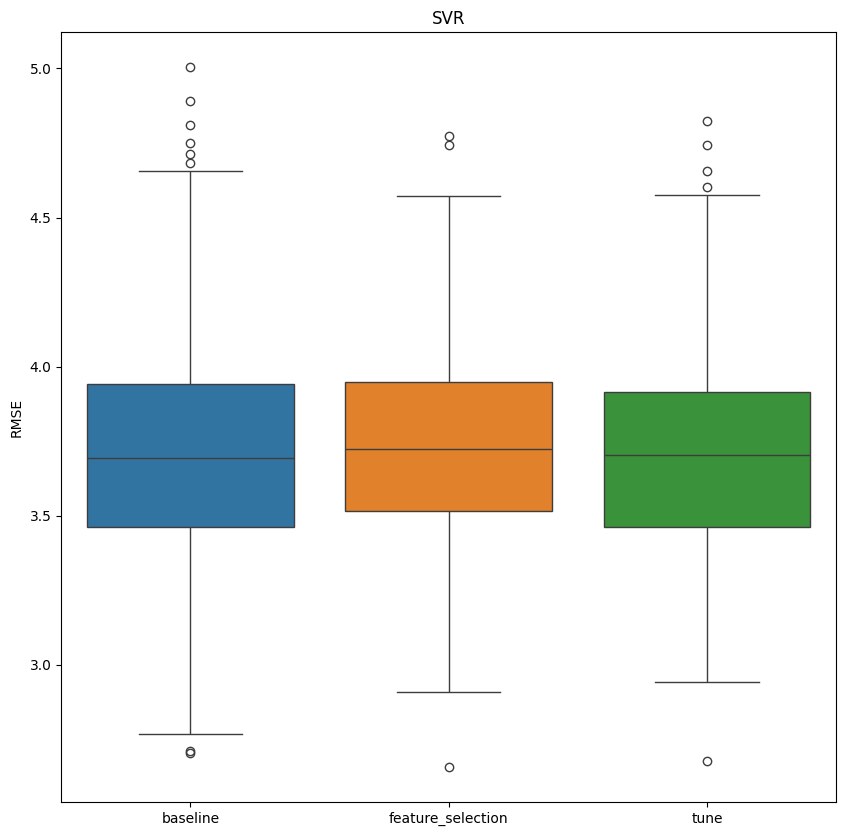

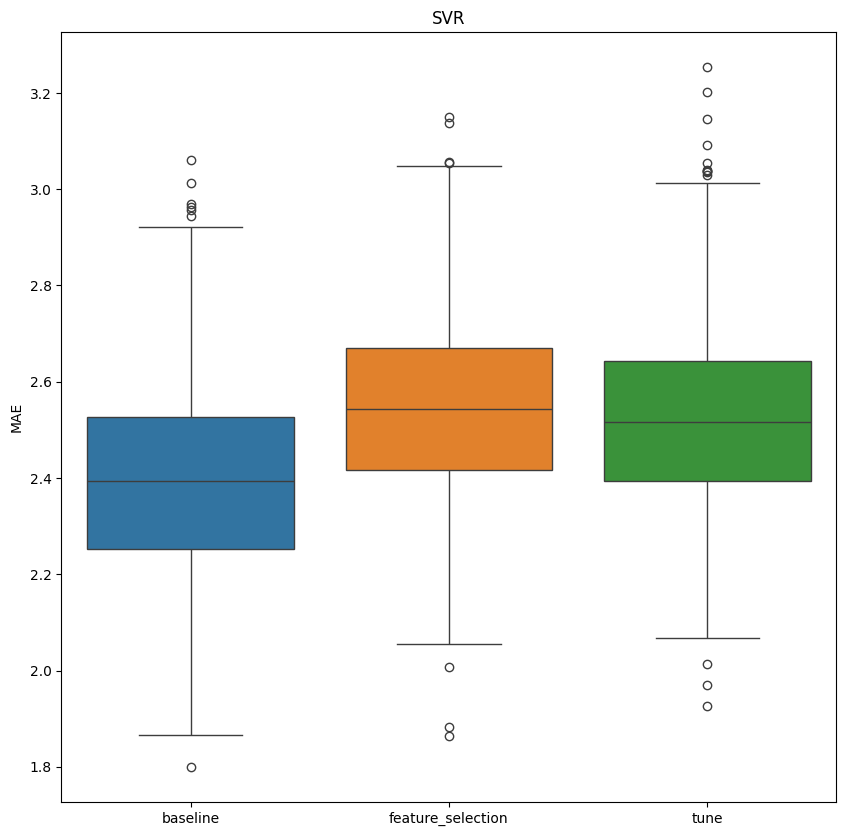

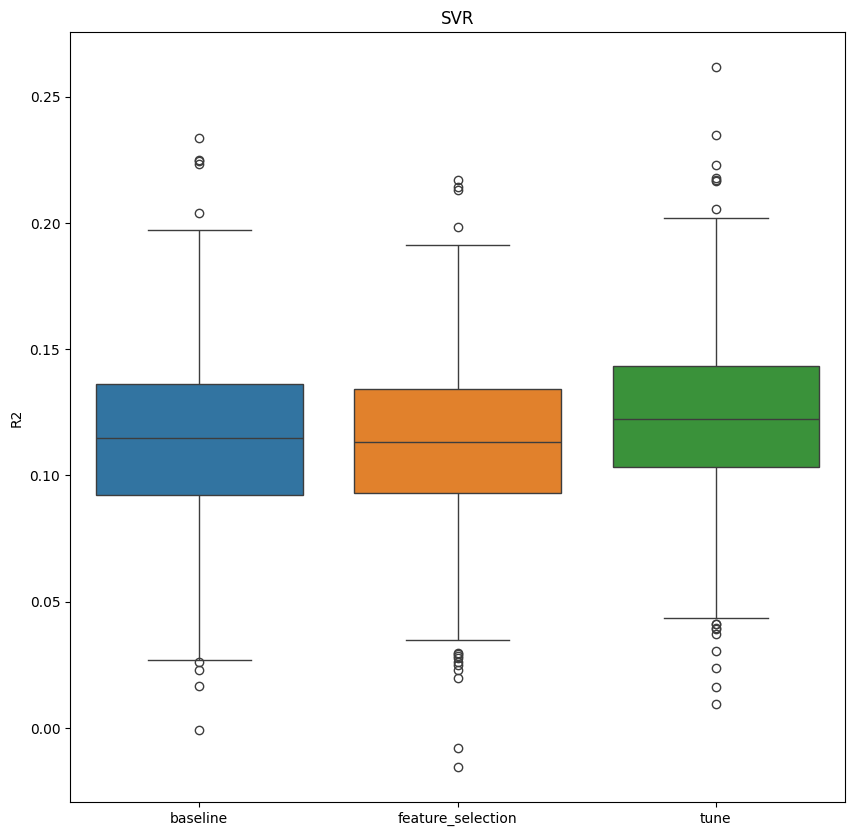

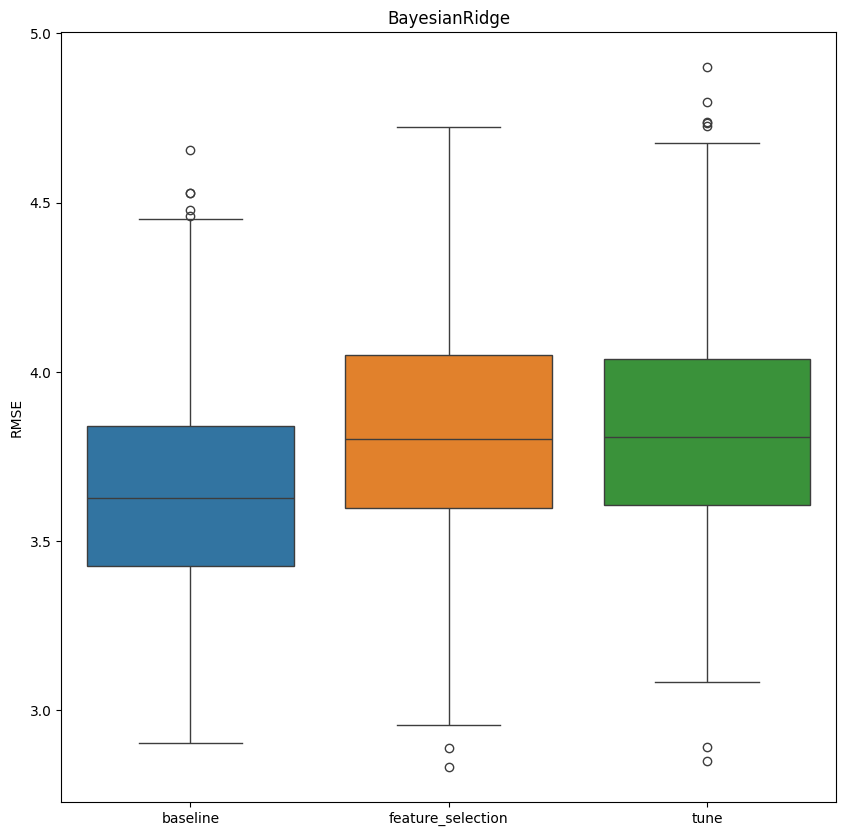

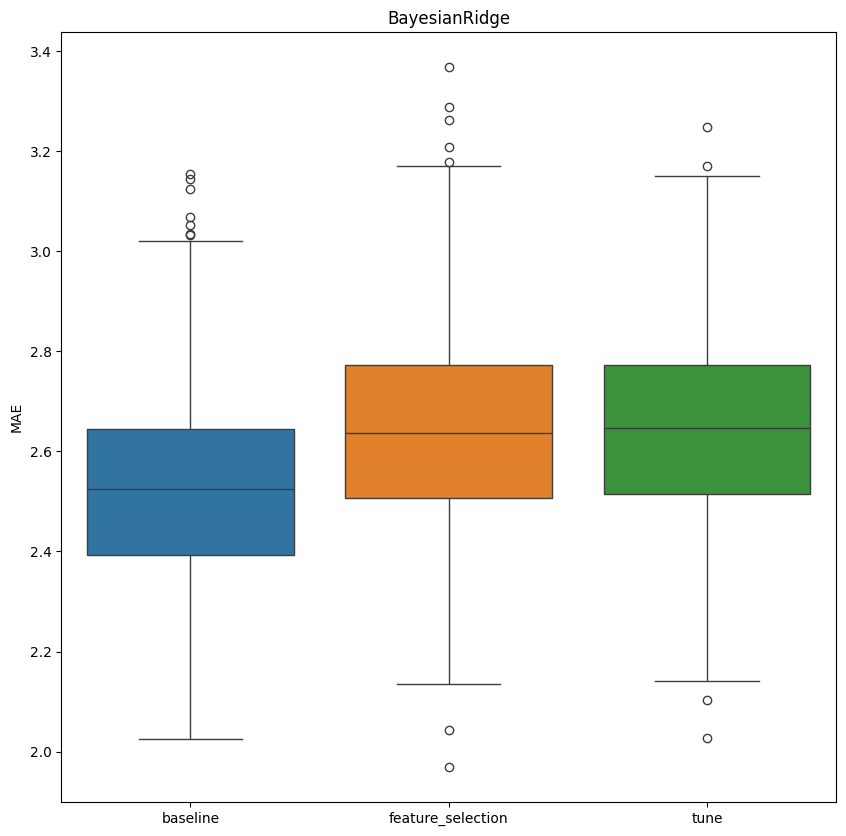

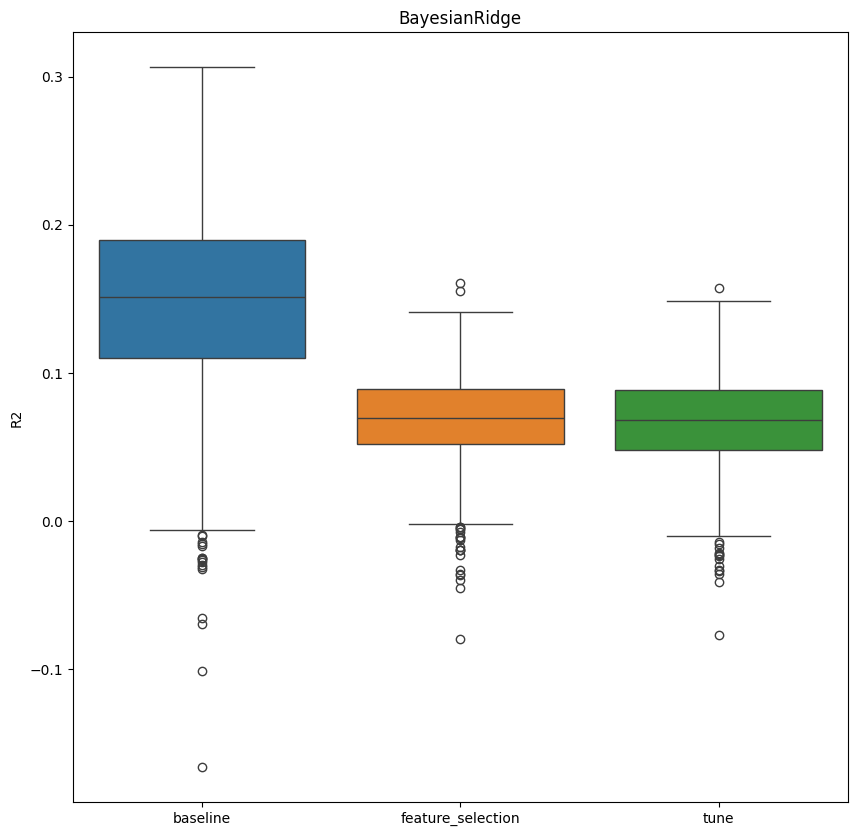

In [8]:
plot_metrics(all_metrics)

In [9]:
plot_features_interactive(dev_df.columns.drop("BMI"), MODELS_DIR)

# Model inference - unseen data

       metric        |         mean         |        median        |         std         
-----------------------------------------------------------------------------------------
        RMSE         |        3.6853        |        3.6792        |        0.2889       
        MAE          |        2.5746        |        2.5733        |        0.1766       
         R2          |        0.1389        |        0.1403        |        0.0364       


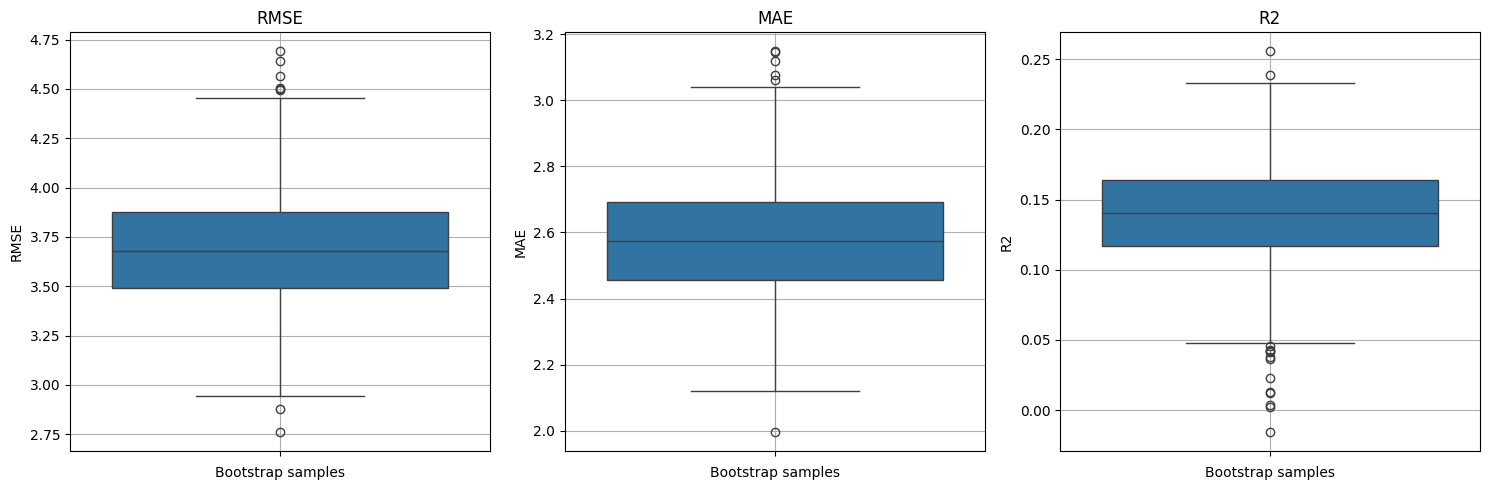

RMSE:  3.682185238227655
MAE:  2.5713369860548716
R2:  0.14310746474852787


In [10]:
best_model_type = "ElasticNet"
best_model_model = "tune"


# If you want to use bootstrapping
metrics = inference(
    model_path=MODELS_DIR,
    model_name=best_model_type,
    mode=best_model_model,
    test_df=val_df,     # I am using the validation set here, but 
                        # the actual inference set must be used
    target_name="BMI",
    bootstrap=True,
    n_bootstrap=1000
)

# If you only want to get the y_pred without bootstrapping
y_pred = inference(
    model_path=MODELS_DIR,
    model_name=best_model_type,
    mode=best_model_model,
    test_df=val_df,     # I am using the validation set here, but 
                        # the actual inference set must be used
    target_name="BMI",
    bootstrap=False
)

In [11]:
# To save the y_pred to a CSV file
file_name = "inference_y_pred.csv"
y_pred_df = pd.DataFrame(y_pred, columns=["y_pred"])
y_pred_df.to_csv(
    os.path.join(BASE_DIR, file_name),
    index=False
)